In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [3]:
!pip3 install -U imbalanced-learn

In [4]:
## smote to balance the data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [5]:
X_test, y_test = sm.fit_resample(X_test, y_test)

In [6]:
model = Sequential()

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [7]:
history = model.fit(x = X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/200


2022-12-01 01:47:19.434017: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11339/11339 [==============================] - 15s 1ms/step - loss: 0.8373 - accuracy: 0.6697 - val_loss: 0.7375 - val_accuracy: 0.7095
Epoch 2/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7566 - accuracy: 0.7055 - val_loss: 0.7320 - val_accuracy: 0.7167
Epoch 3/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7406 - accuracy: 0.7115 - val_loss: 0.7179 - val_accuracy: 0.7199
Epoch 4/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7316 - accuracy: 0.7149 - val_loss: 0.7087 - val_accuracy: 0.7237
Epoch 5/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7223 - accuracy: 0.7184 - val_loss: 0.7012 - val_accuracy: 0.7270
Epoch 6/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7194 - accuracy: 0.7197 - val_loss: 0.7030 - val_accuracy: 0.7273
Epoch 7/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7152 - accuracy: 0.7217 - val_loss: 0.7038

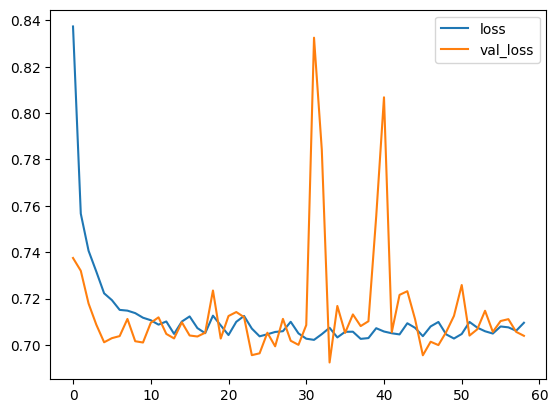

In [8]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()
plt.show()

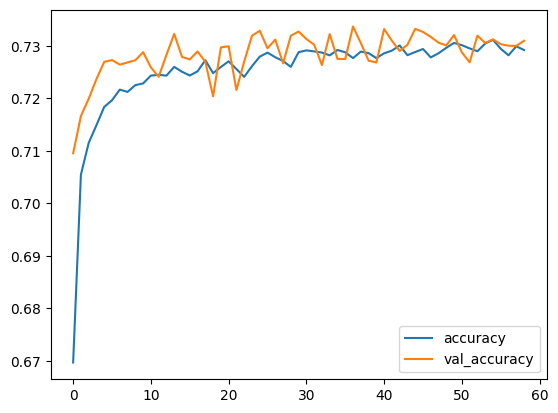

In [9]:
losses[['accuracy', 'val_accuracy']].plot()
plt.show()

In [10]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [11]:
preds = model.predict(X_train)

11339/11339 [==============================] - 37s 3ms/step


In [12]:
print(preds[0])

[2.3984810e-02 5.4217116e-07 9.7333175e-01 2.5810603e-05 2.6571597e-03]


In [13]:
print(np.sum(preds[0]))

1.0


In [14]:
matrix = confusion_matrix(y_train.argmax(axis=1), preds.argmax(axis=1))

In [15]:
matrix

array([[43350,  7893,  5045,  3729, 12549],
       [ 2562, 68612,   585,   110,   697],
       [  413,    48, 69784,  1809,   512],
       [ 1147,  2474,   306, 57657, 10982],
       [16726,  8791,  2761, 14730, 29558]])

In [16]:
print(classification_report(y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.60      0.63     72566
           1       0.78      0.95      0.86     72566
           2       0.89      0.96      0.92     72566
           3       0.74      0.79      0.77     72566
           4       0.54      0.41      0.47     72566

    accuracy                           0.74    362830
   macro avg       0.73      0.74      0.73    362830
weighted avg       0.73      0.74      0.73    362830



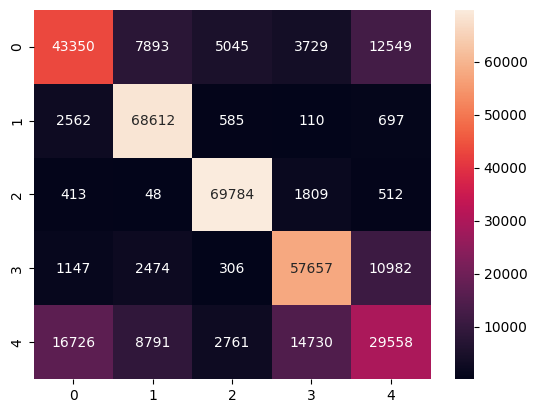

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()

## For the testing dataset

In [18]:
preds = model.predict(X_test)

5561/5561 [==============================] - 21s 4ms/step


In [19]:
print(preds[0])

[0.06482967 0.00102538 0.91062504 0.00197586 0.02154409]


In [20]:
print(np.sum(preds[0]))

1.0


In [21]:
matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

In [22]:
matrix

array([[21106,  3990,  2578,  1964,  5948],
       [ 2103, 32342,   370,   176,   595],
       [  247,    21, 34297,   609,   412],
       [  562,  1500,   184, 28040,  5300],
       [ 8333,  4461,  1444,  7065, 14283]])

In [23]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62     35586
           1       0.76      0.91      0.83     35586
           2       0.88      0.96      0.92     35586
           3       0.74      0.79      0.76     35586
           4       0.54      0.40      0.46     35586

    accuracy                           0.73    177930
   macro avg       0.72      0.73      0.72    177930
weighted avg       0.72      0.73      0.72    177930



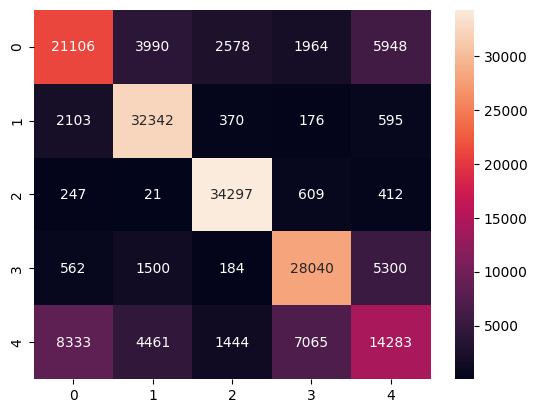

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()

In [25]:
model.save('../saved_models/deep_learning_classifier.h5')